In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

[I 2025-04-27 06:23:11,016] A new study created in memory with name: no-name-c729e038-4c74-4254-a48e-956ce0417a19
[I 2025-04-27 06:24:08,414] Trial 0 finished with value: 0.9631578947368421 and parameters: {'n_estimators': 4403, 'learning_rate': 0.010576925081951643, 'num_leaves': 76, 'max_depth': 8, 'min_child_samples': 93, 'subsample': 0.7306700094061268, 'colsample_bytree': 0.41061516136433246, 'reg_alpha': 1.4637434449176034e-07, 'reg_lambda': 0.00013082323697607393}. Best is trial 0 with value: 0.9631578947368421.
[I 2025-04-27 06:25:09,490] Trial 1 finished with value: 0.9710526315789474 and parameters: {'n_estimators': 6232, 'learning_rate': 0.08103852013796978, 'num_leaves': 33, 'max_depth': 12, 'min_child_samples': 76, 'subsample': 0.5402101047913597, 'colsample_bytree': 0.9695110083955313, 'reg_alpha': 0.3689533856053422, 'reg_lambda': 0.00012068478154317073}. Best is trial 1 with value: 0.9710526315789474.
[I 2025-04-27 06:27:27,716] Trial 2 finished with value: 0.9684210526

Best trial:
Accuracy: 0.9789473684210526
Best hyperparameters:  {'n_estimators': 497, 'learning_rate': 0.04427585693743461, 'num_leaves': 69, 'max_depth': 9, 'min_child_samples': 87, 'subsample': 0.6285482534879282, 'colsample_bytree': 0.6208723004962708, 'reg_alpha': 0.023395430708157004, 'reg_lambda': 3.0403831062013343e-06}


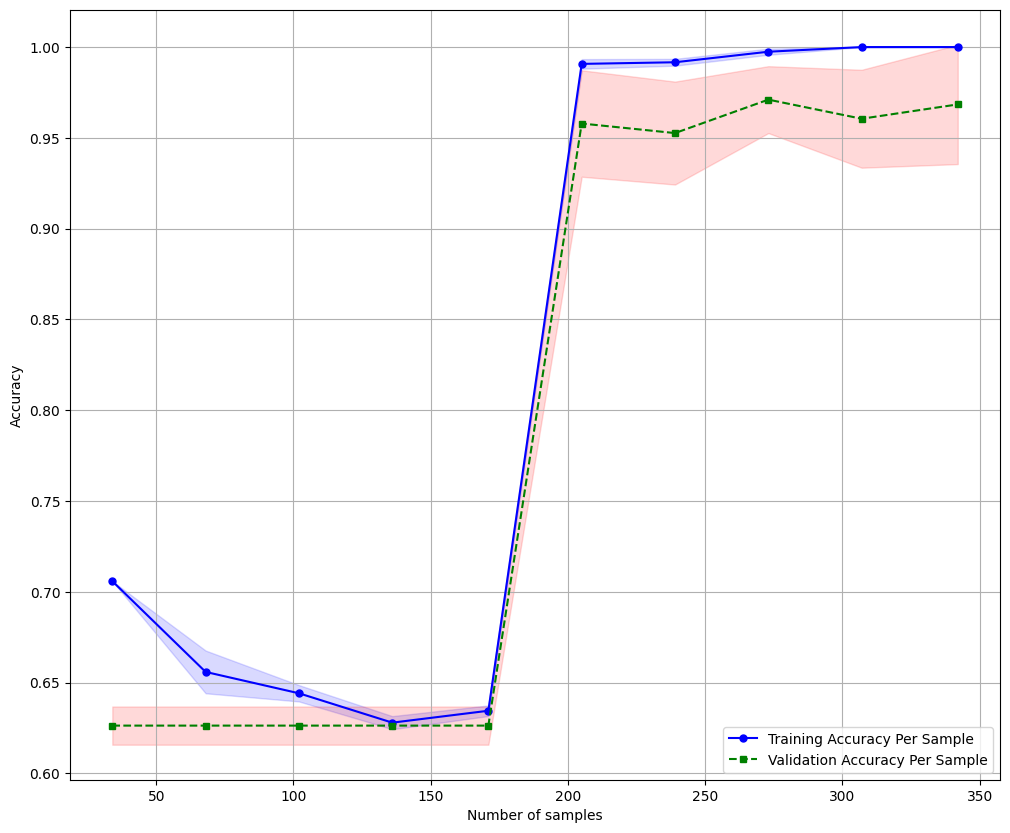

Confusion Matrix
[[ 59   5]
 [  1 106]]
Accuracy: 0.9649, Precision: 0.9550, Recall: 0.9907, F1: 0.9725, AUC: 0.9899


In [2]:
outlier_params = {'n_neighbors': 20}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'loc', outlier_params)

helper.train_and_evaluate_model('lgbm', df_train_outlier_removed.iloc[:,:-1], X_test_scaled, df_train_outlier_removed.iloc[:,-1], y_test)